In [53]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error # For comparisson between lines plotted, usage up for discussion.

### Import and Optimiza Data

UN WPP has 2 different sets of data listed on their CSV downloads, which can be found if the `./data/` path. For this project the `./data/data_Medium.csv` is used to derive analytics and visualizations. Below, you can find the code related to import and optimization of dtypes for said data file.  

In [54]:
# Read data from .parquet file
df = pd.read_parquet('./data/data_Medium.parquet')

df.set_index(df['Time'], inplace=True)

'''Inspect dtypes and memory usage:
 df.info(memory_usage='deep')'''
 
# check if columns of type int64 can be converted to smaller contirners
int_cols = df.select_dtypes(include='int64')
for col in int_cols.columns:
    
    if (df[col].max() < 32767):
        df[col] = df[col].astype('int16')

# Set 'Time' as type datetime64[ns]
df['Time'] = pd.to_datetime(df['Time'], format='%Y') # format = '%Y' is the only matching format for the dataset.

df = df[df['Time'] != '2101-01-01'] # the year 2101 is excluded from data as it Nan values for ever variable excep 'TPopulation1Jan'

# df.info(memory_usage='deep') for dtype and memory info after the optimizations

### Growth Rate Visualization

Projections were made for multiple grouping formats such as geographic, development based and income level based. Data plotted below uses the SDG (Sustainable Development Goals) as its divider. This grouping categorizes regions by the SDG's assosiated with them which, in turn, means that the countries of  the same SDG region should share similar policies when it comes to population.

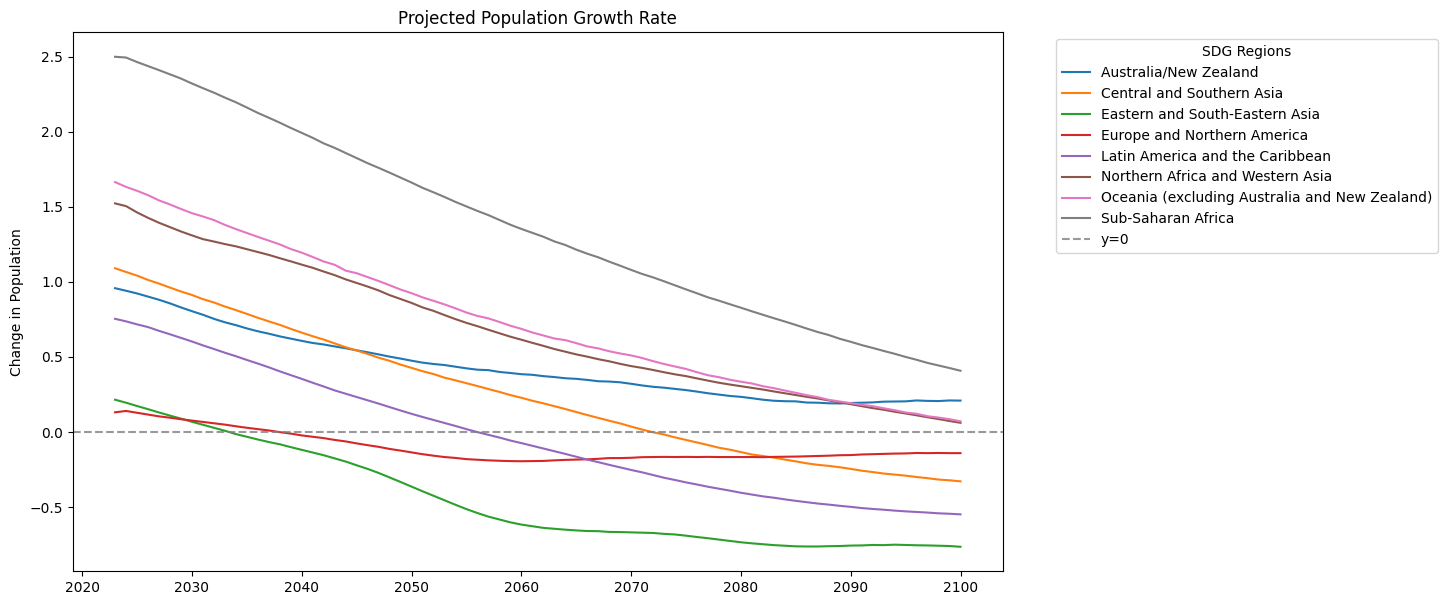

<Figure size 640x480 with 0 Axes>

In [55]:
df_projections = df.loc[(df['Time'] > '2022-01-01')]

gr = df_projections.loc[df_projections['LocTypeName'] == 'SDG region',:].groupby(by='Location') 

plt.figure(figsize=(12,7))

for loc, data in gr:
    plt.plot(data.index ,data['PopGrowthRate'], label=f'{loc}')
    
plt.axhline(0, color='grey', linestyle='dashed', label='y=0', alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SDG Regions')


plt.ylabel('Change in Population')
plt.title('Projected Population Growth Rate')
plt.show()
plt.clf()

### Potential conclusions from data

#### Negative growth rates

Projections made by the UN are broadly in line with the intuitive assumptions one would make about this subject. However, there is an important observation to make from this data. 
As the plot above displays, four regions are to fall below 0% growth and stay negative for the projected duration. Reduction of the global population is most probably going to become a necessity. This is visible in current observations and research conducted. It is a pertinent but commonly known issue, albeit the projected timing of this negative growth for some regions is closer than one may intuitively assume.

In [56]:
negGrowth = {loc: np.datetime_as_string(data[data['PopGrowthRate'] <= 0]['Time'].values[0], unit='Y') if not data[data['PopGrowthRate'] <= 0].empty else 'N/A' for loc, data in gr}  

df_negGrowth = pd.DataFrame(list(negGrowth.items()), columns=['region', 'negative_growth_beginning'])
df_negGrowth

,region,negative_growth_beginning
0,Australia/New Zealand,N/A
1,Central and Southern Asia,2072
2,Eastern and South-Eastern Asia,2034
3,Europe and Northern America,2038
4,Latin America and the Caribbean,2056
5,Northern Africa and Western Asia,N/A
6,Oceania (excluding Australia and New Zealand),N/A
7,Sub-Saharan Africa,N/A


By 2034, "Eastern and South-Eeastern Asia" is expected to see a reduced population. We know overpopulation is a pressing matter in the region; 2034 is ultimately a projection within expectations. The issue is acknowledged and policies are in place to have growth contained. The projection model rightfully expects the earliest conversion to negative growth from this region.

"Central and Southern Asia", despite not being overpopulated to the extent of 'Eastern and South-Eastern Asia' has been experiencing a steady slowdown in its population growth. When looking at the countries included in this region, we can see the outlier that is India. On a regional basis, 2072 is a sensible projection. On the other hand, India is a profusely overpopulated country. By being included in the region, India itself may be creating the expectation of a negative growth rate. The emergence of population-related problems in Pakistan and Bangladesh is a possibility, which may also influence the projection model. Despite that, the remaining Southern Asia countries are relatively sparse in population, more so for Central Asia.

"Latin America and the Caribbean" consists of many small countries by land area and population. A lack of land area, though it may seem unrelated, can create herculean problems in sustainability. As dictated by the economies of scale, the operation of such small countries becomes a colossal problem. Said countries are easily affected by changes in external economies and commonly have net negative migrations. Subsequently, Multiple countries with reduced populations already exist in the region. Consequently, 2056 is an agreeable projection for this region.

Projections for the "Europe and Northern America" region are the most striking. Although the countries of this region are prime targets of migration and display positive population growth, the model expects a reduction in population by 2038. Problems that were apparent in previously discussed SDG regions proved the predictions made by the model intuitively agreeable. Be that as it may, for this SDG region, it is hard to understand the underlying parameters that lead the model to predict such an early timeframe. The economic stability, access to resources and global influence of said countries are vast enough that a population reduction seems possible only as a choice.

### Dynamics of Negative Growth Rate

By comparing the birth and death rates, some insight may be uncovered. The outcomes of this comparison will be similar to Natural Change. (included in the dataset as 'NatChange') On the contrary, having separate graphs for births and deaths can help derive observations by providing insight into trends in individual components used in natural change calculations.

Based on intuitive reasoning, birth rates should decrease. Two main factors that constitute this decrease are population control policies and increased poverty, making it hard to bear and look after a child. One would assume that a higher population would inevitably lead to a larger workforce and labour output, which should enhance production. However, there exists a theoretical maximum output for every country. After said output is achieved, any increase in population would result in higher consumption and no increase in production.

With the same logic, death rates should increase. As the birth rates decrease, the average age of the population will increase, and the younger generations will always be smaller in population as long as the decrease in births continues. Despite the technological advancements possibly increasing life expectancy throughout the projection, a significantly older population will result in significantly more deaths.

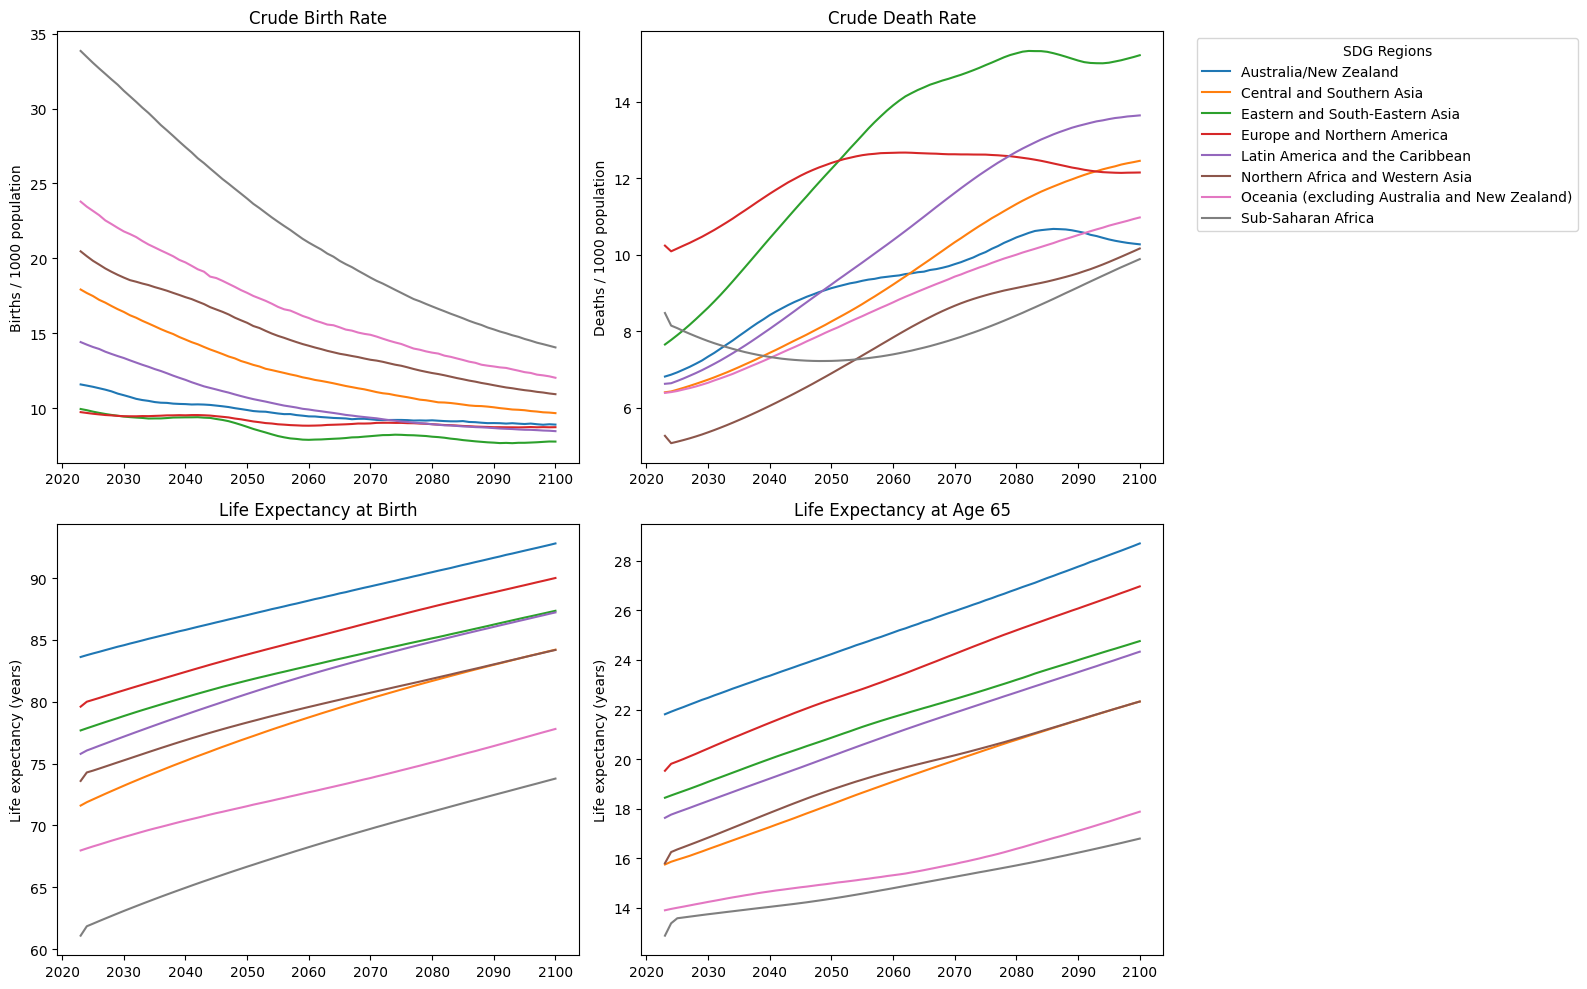

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))  # Creating subplots

for loc, data in gr:
    ax1.plot(data.index, data['CBR'], label=loc)
ax1.set_title("Crude Birth Rate")
ax1.set_ylabel('Births / 1000 population')

for loc, data in gr:
    ax2.plot(data.index, data['CDR'], label=loc)
ax2.set_title("Crude Death Rate")
ax2.set_ylabel('Deaths / 1000 population')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="SDG Regions")

for loc, data in gr:
    ax3.plot(data.index, data['LEx'], label=loc)
ax3.set_title("Life Expectancy at Birth")
ax3.set_ylabel('Life expectancy (years)')

for loc, data in gr:
    ax4.plot(data.index, data['LE65'], label=loc)
ax4.set_title("Life Expectancy at Age 65")
ax4.set_ylabel('Life expectancy (years)')

plt.tight_layout()
plt.show()


#### Analyzing the plots

The data depicted in the graphs are in line with the intuitive reasoning provided above. Moreover, the rate of change in life expectancy is similar for every region, suggesting that technological advancements will be available to every region at, more or less, the same time. Birth rates are projected to decrease at a similar pace between regions, albeit not as similar as the life expectancy metrics. Death rates, though, are another story. The graph is quite chaotic in comparison, which indicates that it may be the main factor that separates projection results for SDG regions. 

### Outcomes of Inter-Regional Migration

Until now, the metrics on display were not separating migration and native population. Migration, however, plays a significant role in a given region. More developed regions are known to receive net positive migration. Underdeveloped regions, on the other hand, are prone to experiencing net negative migration and brain drain. This is an observed and known phenomenon which may result in slower rates of techonological advancement in some regions. As seen in the plot, life expectancy is consistently higher in developed regions. Interestingly, rate of change (aka. slope) of the increase in life expectancy is quite similar for every region in the projections. Of course, increasing the average life expectancy gets continously harder, thus, developed nations with higher life expectancies would need more investment and time to further increase this metric. Underdeveloped regions can experience the same amount of increase with a fraction of the investment due to their lower average life expectancy. This may be the reasonfor the similar slopes that emerge from every projected region.

Connecting the pace of advancement and brain drain in a binary and linear relation oversimplifies the complex and intertwined parameters that may be at play. The complexity of this matter makes it hard to judge or even notice potential flows in the model or its projections. What we assume to be correct in the context of this binary relation might prove to be completely inaccurate as more and more parameters are introduced.

Be that as it may, net migration is a good metric to compare between regions as it may be insightful in to see if this model expects a change in the current migration routes.

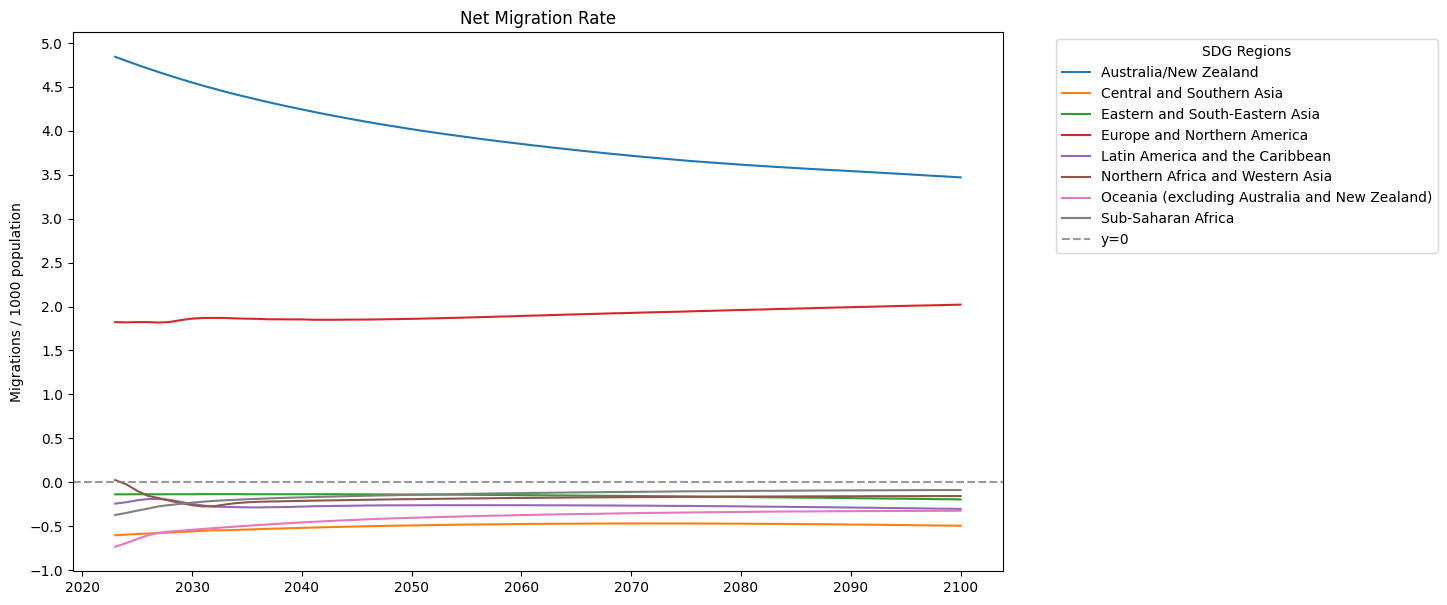

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(12,7))

for loc, data in gr:
    plt.plot(data.index ,data['CNMR'], label=f'{loc}')
    
plt.axhline(0, color='grey', linestyle='dashed', label='y=0', alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SDG Regions')
plt.yticks(np.arange(-1,5.5,0.5))

plt.ylabel('Migrations / 1000 population')
plt.title('Net Migration Rate')
plt.show()
plt.clf()

#### Trends in net migration

Looking at the plot above, it is clear that no major change in the migration routes and rates are expected by 2100 in the projections. 'Australia/New Zealand', despite having the highest net migrations throughout the data, is expected to see a decrease in this metric. There are two potential scenarios that may be at play in making the net migrations decrease in the SDG region. First possibility is a change in the migration routes, this is the possibility that describes a decrease in migrations to 'Australia/New Zealand' but a constant or increasing number of total migrants.

In [89]:
sum = 0
for loc, data in gr:
        if loc != 'Australia/New Zealand':
                sum += data['CNMR'].iloc[-1] - data['CNMR'].iloc[0]
   
ausMig = df_projections[df_projections['Location'] == 'Australia/New Zealand'].CNMR.iloc[-1] - df_projections[df_projections['Location'] == 'Australia/New Zealand'].CNMR.iloc[0]
print(f"Total Change in migrants / 1000 population: {round(sum,4)} \nChange in migrants / 1000 population for 'Australia/New Zealand': {round(ausMig,4)}")

Total Change in migrants / 1000 population: 0.701 
Change in migrants / 1000 population for 'Australia/New Zealand': -1.373


By checking the change in net migrations for every region except 'Australia/New Zealand' and comparing it to the decrease in 'Australia/New Zealand' we can cross the possibility of a change in migration routes. The negative change experienced in one region is not met with a equal positive change when looking at the sum of all other regions. Therefore, the projection depicts a decline in net migrants overall.

### Male and Female Mortality Rates

Mortality rates between males and females show differences. On average, a male is consistanlty more likely to die of any cause when compared to a female in the same age group. Although there are several theories about why this may be, whithout concrete proof, making connections between theories the projection data would not be furitful.

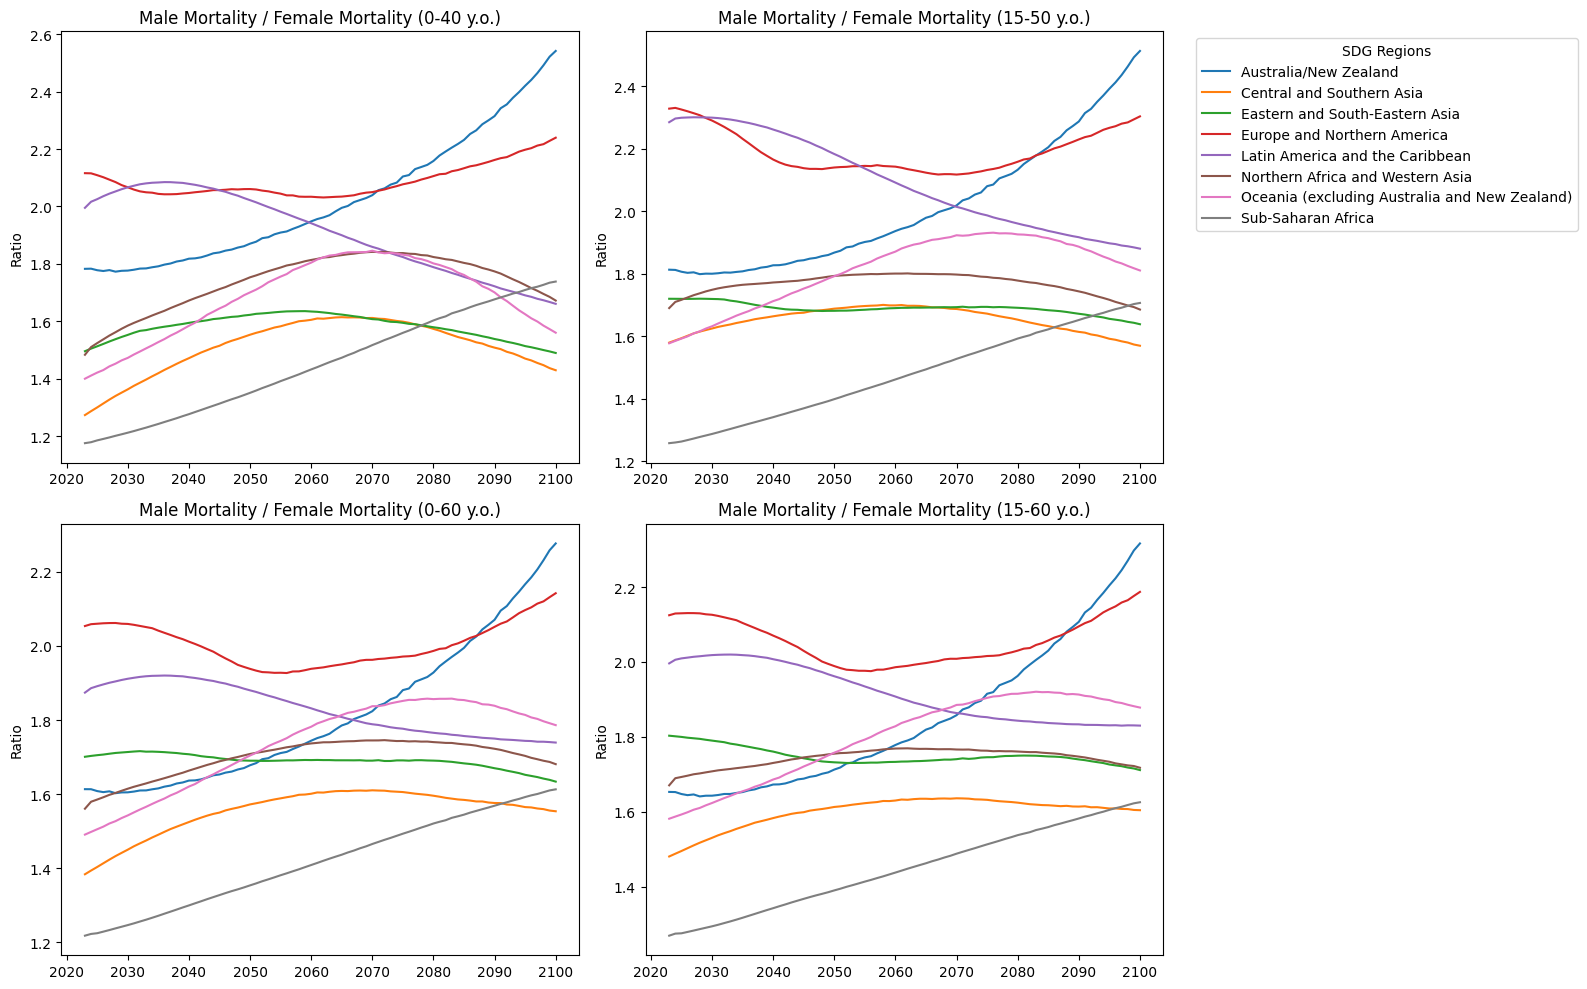

In [90]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))  # Creating subplots

for loc, data in gr:
    ax1.plot(data.index, data['Q0040Male'] / data['Q0040Female'], label=loc)
ax1.set_title("Male Mortality / Female Mortality (0-40 y.o.)")
ax1.set_ylabel('Ratio')

for loc, data in gr:
    ax2.plot(data.index, data['Q1550Male'] / data['Q1550Female'], label=loc)
ax2.set_title("Male Mortality / Female Mortality (15-50 y.o.)")
ax2.set_ylabel('Ratio')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="SDG Regions")

for loc, data in gr:
    ax3.plot(data.index, data['Q0060Male'] / data['Q0060Female'], label=loc)
ax3.set_title("Male Mortality / Female Mortality (0-60 y.o.)")
ax3.set_ylabel('Ratio')

for loc, data in gr:
    ax4.plot(data.index, data['Q1560Male'] / data['Q1560Female'], label=loc)
ax4.set_title("Male Mortality / Female Mortality (15-60 y.o.)")
ax4.set_ylabel('Ratio')

plt.tight_layout()
plt.show()

#### Patterns in mortality rates

There is no apparent pattern that is shared by all SDG Regions, plots for all age groups look chaotic in comparison to other metrics' visualizations such as population growth and life expectancy. 'Australia/New Zealand' and 'Sub-Saharan Africa' are the only regions with a visible positive trend in the raito. (positive implies an increase in male deaths per 1 female death) This metric is not consistent over time or between regions, therefore making a clear-cut observation is difficult. One thing to note however, is that the model des not estimate a significant change over time for this ratio.

### Changes in variables

A pattern may exist in the variable that experieced the most amount of change (in %) for every SDG region. By calculating the per cent change of every metric and listing the metric with the highest absolute change for every group, it is possible to look at thte rates of change and nullify difference in units between variables.

In [83]:
gr = df_projections.loc[df_projections['LocTypeName'] == 'SDG region'].groupby('Location')

numeric_columns = df_projections.select_dtypes(include=[np.number]).columns
numeric_columns=numeric_columns.drop(['SortOrder', 'LocID', 'SDMX_code', 'LocTypeID', 'ParentID', 'VarID'])

percent_change = gr[numeric_columns].apply(lambda group: (group.iloc[-1] - group.iloc[0]) / group.iloc[0] * 100)

change_df = pd.DataFrame(percent_change)

largest_abs_cols = change_df.abs().idxmax(axis=1)

result_df = pd.DataFrame(index=change_df.index)

for idx, col in largest_abs_cols.items():
    
    value = change_df.loc[idx, col]
    
    result_df.loc[idx, 'Variable'] = col
    result_df.loc[idx, '% Change'] = value

result_df['% Change'] = result_df['% Change'].apply(lambda x: round(x,2))
result_df



,Variable,% Change
Location,,
Australia/New Zealand,NatChange,-140.31
Central and Southern Asia,DeathsFemale,155.99
Eastern and South-Eastern Asia,PopGrowthRate,-455.81
Europe and Northern America,NatChangeRT,572.16
Latin America and the Caribbean,PopGrowthRate,-172.81
Northern Africa and Western Asia,NetMigrations,-1158.33
Oceania (excluding Australia and New Zealand),DeathsFemale,259.86
Sub-Saharan Africa,DeathsFemale,236.39


#### Trends in rate of change

Across all SDG Regions, there are 5 variables that were subject to the highest change. 'DeathsFemale' which holds the total female mortality projections appearrears 3 times as the highest changing variable (it is the mode variable in the set) and the direction of change for this variable is consistently positive. Second variable that follows is 'PopGrowthRate' with 2 appearances, both being negative changes. These 2 variales are the only ones that appear more than once in this table.

All variables listed contain negative changes (in terms of effect on total population) except a 572% increae in 'NatChangeRT' for 'Europe and Northern America'. said negative changes are mostly related to death totals ang overall population growth rate, which indicates an expected plateau in growth over the projected time frame. This plateau is to be expected by current research, but the numerical limit of population for Earth is an unkown.

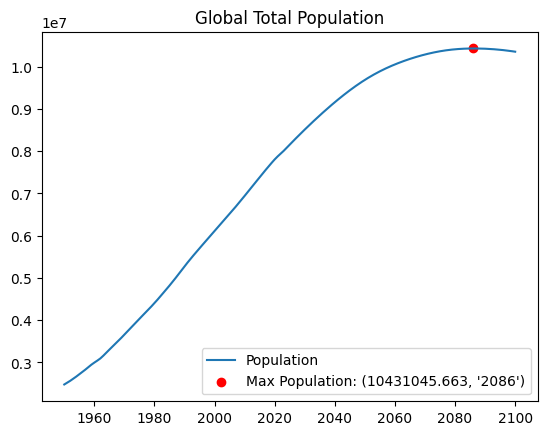

In [109]:
plt.plot(df.loc[df['LocID'] == 900].index, df.loc[df['LocID'] == 900].TPopulation1Jan, label='Population')

popGlobal = df.loc[df['LocID'] == 900]

maxPopGlobal = popGlobal.loc[popGlobal['TPopulation1Jan'] == popGlobal['TPopulation1Jan'].max()]

plt.scatter(maxPopGlobal.index, maxPopGlobal['TPopulation1Jan'], color='red', label=f"Max Population: {maxPopGlobal['TPopulation1Jan'].values[0], 
            np.datetime_as_string(maxPopGlobal['Time'].values[0], unit='Y')}")

plt.title('Global Total Population')
plt.legend()

Seen in the plot above, the model expects this limit to be in the range of 10.43 billion total population and in the year 2086. Where this limit lies is an ongoing discussion, therefore making precise assesment of this projection may be difficult. On the other hand, this value of 10.43 billion is a widely aggreed ballpark for this limit.

### Conclusions

All in all, this model and it's projections are largely in line with our expectations. Although, there are many future factors that inevitably sway the data from expectations, assuming the projections made to be fully backwards-looking would be an understatement of the value that could be provided from it. This is a can function as a starting point for research in topics that displayed interesting projected trends, and it may turn our heads to the right directions in terms of reseacrh and crisis prevention.